## Importing required libraries

In [179]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

plt.style.use("ggplot")
sns.set_style("darkgrid")

In [180]:
data = pd.read_csv("./data/preprocessed_data.csv")
test_data = pd.read_csv("./data/test.csv")

## Checking Outliers

In [181]:
data.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_num,Expenses,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S,Transported
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0.0,0,1,0,0,0,0,0,0,1,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1,0,736.0,0,0,0,0,0,1,0,0,0,1,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1,0,10383.0,1,0,0,0,0,0,0,0,0,1,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1,0,5176.0,1,0,0,0,0,0,0,0,0,1,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1,1,1091.0,0,0,0,0,0,1,0,0,0,1,1


<AxesSubplot:xlabel='Expenses', ylabel='Age'>

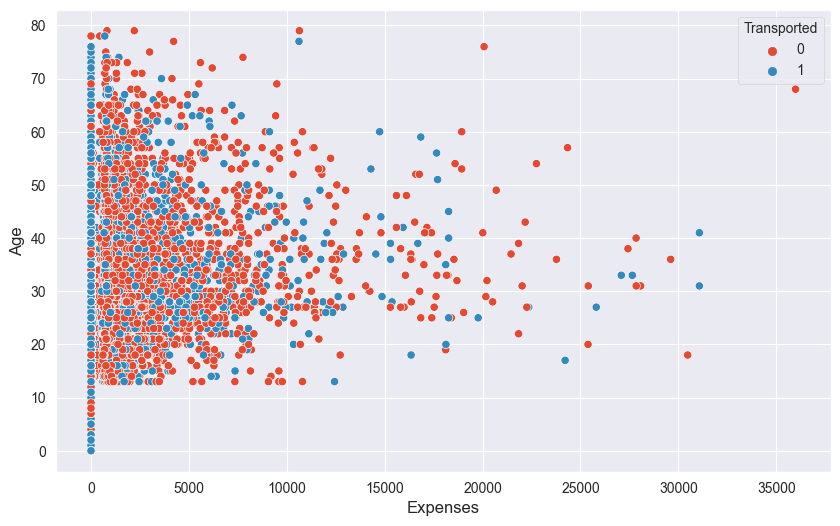

In [182]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Expenses", y="Age", data=data, hue="Transported")

<AxesSubplot:xlabel='Transported', ylabel='Age'>

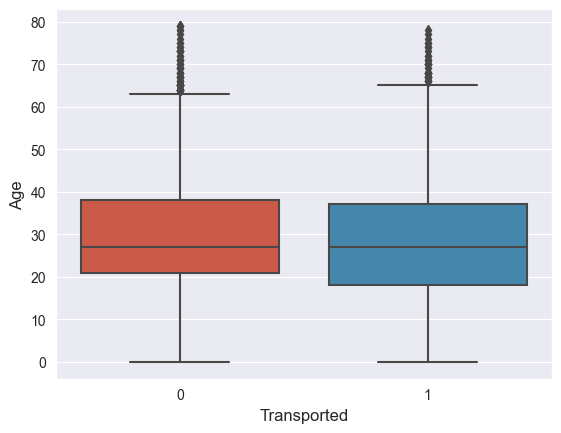

In [183]:
sns.boxplot(x=data["Transported"], y=data["Age"])

#### Outliers from data_cleaning IQR

In [184]:
false_age_outlier = 63.5
true_age_outlier = 65.5

In [185]:
data2 = data.copy(deep=True)

#### Imputing Outliers of Age on data2 with their Median Age

In [186]:
data2.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_num,Expenses,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S,Transported
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0.0,0,1,0,0,0,0,0,0,1,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1,0,736.0,0,0,0,0,0,1,0,0,0,1,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1,0,10383.0,1,0,0,0,0,0,0,0,0,1,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1,0,5176.0,1,0,0,0,0,0,0,0,0,1,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1,1,1091.0,0,0,0,0,0,1,0,0,0,1,1


In [187]:
false_age_filter = (data2["Age"] > false_age_outlier) & (data2["Transported"]==0)
ind_false_age_outlier = data2[false_age_filter].index
ind_false_age_outlier

Int64Index([ 280,  338,  469,  548,  615,  703,  705,  712,  718,  901, 1157,
            1335, 1356, 1390, 1429, 1603, 1607, 1655, 1686, 1734, 1923, 2137,
            2290, 2310, 2361, 2694, 2790, 2822, 2857, 2865, 2884, 3021, 3053,
            3171, 3184, 3526, 3562, 3632, 3971, 4310, 4433, 4657, 4682, 4803,
            5079, 5218, 5242, 5722, 5955, 5958, 6067, 6469, 6582, 6601, 6783,
            7012, 7013, 7038, 7224, 7289, 7387, 7501, 7576, 7584, 7715, 7729,
            7791, 7934, 8042, 8170, 8254, 8369, 8516],
           dtype='int64')

In [188]:
true_age_filter = (data2["Age"] > true_age_outlier) & (data2["Transported"]==1)
ind_true_age_outlier = data2[true_age_filter].index
ind_true_age_outlier

Int64Index([ 118,  378,  416,  779,  848,  917, 1267, 1379, 1714, 2006, 2159,
            2261, 2351, 2484, 2530, 2736, 2786, 2930, 2941, 3104, 3169, 3181,
            3280, 3540, 3930, 4132, 4349, 4934, 5267, 5315, 5353, 6146, 6200,
            6301, 6330, 6451, 7129, 7269, 7330, 8288],
           dtype='int64')

In [189]:
data2["Age"].median()

27.0

In [190]:
data2.loc[ind_false_age_outlier, "Age"] = data2["Age"].median()

In [191]:
data2.loc[ind_false_age_outlier, "Age"]

280     27.0
338     27.0
469     27.0
548     27.0
615     27.0
        ... 
8042    27.0
8170    27.0
8254    27.0
8369    27.0
8516    27.0
Name: Age, Length: 73, dtype: float64

In [192]:
data2.loc[ind_true_age_outlier, "Age"] = data2["Age"].median()
data2.loc[ind_false_age_outlier, "Age"]

280     27.0
338     27.0
469     27.0
548     27.0
615     27.0
        ... 
8042    27.0
8170    27.0
8254    27.0
8369    27.0
8516    27.0
Name: Age, Length: 73, dtype: float64

In [193]:
data2["Age"].max()

65.0

<AxesSubplot:xlabel='Transported', ylabel='Age'>

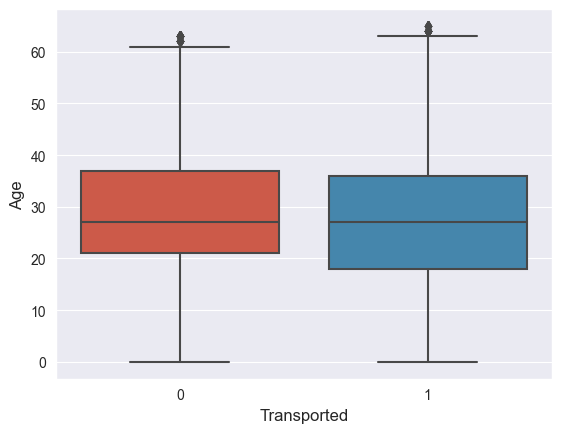

In [194]:
sns.boxplot(x=data2["Transported"], y=data2["Age"])

## Splitting training and validation set

In [195]:
X = data2.iloc[:, :-1]
Y = data2.iloc[:, -1]
X.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_num,Expenses,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0.0,0,1,0,0,0,0,0,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1,0,736.0,0,0,0,0,0,1,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1,0,10383.0,1,0,0,0,0,0,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1,0,5176.0,1,0,0,0,0,0,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1,1,1091.0,0,0,0,0,0,1,0,0,0,1


In [196]:
Y.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

In [197]:
cols = X.columns
cols

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Cabin_num',
       'Expenses', 'Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C',
       'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G',
       'Cabin_deck_T', 'Cabin_side_P', 'Cabin_side_S'],
      dtype='object')

In [198]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=0)

In [199]:
X_train.shape, y_train.shape

((6954, 26), (6954,))

In [200]:
X_valid.shape, y_valid.shape


((1739, 26), (1739,))

### Transforming test data

In [201]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [202]:
index = test_data.pop("PassengerId")
test_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [203]:
test_data.isnull().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [204]:
test_data["HomePlanet"].mode()

0    Earth
Name: HomePlanet, dtype: object

In [205]:
test_data["CryoSleep"].mode()

0    False
Name: CryoSleep, dtype: object

In [206]:
test_data["HomePlanet"].fillna("Earth", inplace=True)
test_data["CryoSleep"].fillna(False, inplace=True)

In [207]:
cabin_values = test_data["Cabin"].value_counts().head(20).index
cabin_values

Index(['G/160/P', 'D/273/S', 'B/31/P', 'G/748/S', 'E/228/S', 'A/4/S',
       'G/597/P', 'G/73/S', 'F/579/P', 'D/92/P', 'B/214/P', 'G/587/P',
       'C/31/S', 'C/177/S', 'B/72/S', 'B/242/P', 'G/737/S', 'G/591/P',
       'C/295/P', 'G/1052/P'],
      dtype='object')

In [208]:
test_data["Cabin"].fillna("missing", inplace=True)

In [209]:
test_data["Cabin"] = test_data["Cabin"].map(
    lambda x: random.choice(cabin_values) if x=="missing" else x
)

In [210]:
test_data["Cabin"].isnull().sum()

0

In [211]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   bool   
 2   Cabin         4277 non-null   object 
 3   Destination   4185 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Name          4183 non-null   object 
dtypes: bool(1), float64(6), object(5)
memory usage: 371.9+ KB


In [212]:
test_data["Destination"].mode()

0    TRAPPIST-1e
Name: Destination, dtype: object

In [213]:
test_data["Destination"].fillna("TRAPPIST-1e", inplace=True)

In [214]:
test_data["Age"].median()

26.0

In [215]:
test_data["Age"].fillna(26, inplace=True)

In [216]:
test_data["VIP"].mode()

0    False
Name: VIP, dtype: object

In [217]:
test_data["VIP"].fillna(False, inplace=True)

In [218]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   bool   
 2   Cabin         4277 non-null   object 
 3   Destination   4277 non-null   object 
 4   Age           4277 non-null   float64
 5   VIP           4277 non-null   bool   
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Name          4183 non-null   object 
dtypes: bool(2), float64(6), object(4)
memory usage: 342.6+ KB


In [219]:
test_data["RoomService"].mode()

0    0.0
Name: RoomService, dtype: float64

In [220]:
test_data["RoomService"].fillna(0, inplace=True)

In [221]:
test_data["FoodCourt"].mode()

0    0.0
Name: FoodCourt, dtype: float64

In [222]:
test_data["FoodCourt"].fillna(0, inplace=True)

In [223]:
test_data["ShoppingMall"].mode()

0    0.0
Name: ShoppingMall, dtype: float64

In [224]:
test_data["ShoppingMall"].fillna(0, inplace=True)

In [225]:
test_data["Spa"].mode()

0    0.0
Name: Spa, dtype: float64

In [226]:
test_data["Spa"].fillna(0, inplace=True)

In [227]:
test_data["VRDeck"].mode()

0    0.0
Name: VRDeck, dtype: float64

In [228]:
test_data["VRDeck"].fillna(0, inplace=True)

In [229]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   bool   
 2   Cabin         4277 non-null   object 
 3   Destination   4277 non-null   object 
 4   Age           4277 non-null   float64
 5   VIP           4277 non-null   bool   
 6   RoomService   4277 non-null   float64
 7   FoodCourt     4277 non-null   float64
 8   ShoppingMall  4277 non-null   float64
 9   Spa           4277 non-null   float64
 10  VRDeck        4277 non-null   float64
 11  Name          4183 non-null   object 
dtypes: bool(2), float64(6), object(4)
memory usage: 342.6+ KB


In [230]:
test_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [231]:
test_data["CryoSleep"].replace({True:1, False:0}, inplace=True)

In [232]:
test_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,Earth,1,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,Earth,0,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,Europa,1,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,Europa,0,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,Earth,0,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [233]:
test_data["VIP"].replace({True:1, False:0}, inplace=True)

In [234]:
test_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,Earth,1,G/3/S,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,Earth,0,F/4/S,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,Europa,1,C/0/S,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,Europa,0,C/1/S,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,Earth,0,F/5/S,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [235]:
test_data["Expense"] = test_data[
    ["FoodCourt", "RoomService", "ShoppingMall", "Spa", "VRDeck"]
].sum(axis=1)

In [236]:
test_data[["Cabin_deck", "Cabin_num", "Cabin_side"]] = test_data["Cabin"].str.split("/", expand=True)
test_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Expense,Cabin_deck,Cabin_num,Cabin_side
0,Earth,1,G/3/S,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.0,G,3,S
1,Earth,0,F/4/S,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,2832.0,F,4,S
2,Europa,1,C/0/S,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.0,C,0,S
3,Europa,0,C/1/S,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,7418.0,C,1,S
4,Earth,0,F/5/S,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,645.0,F,5,S


In [237]:
test_data["Cabin_num"] = test_data["Cabin_num"].astype(int)

In [238]:
home_planet_dummies = pd.get_dummies(test_data["HomePlanet"], prefix="HomePlanet")
test_data = test_data.join(home_planet_dummies)
test_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Expense,Cabin_deck,Cabin_num,Cabin_side,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,Earth,1,G/3/S,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.0,G,3,S,1,0,0
1,Earth,0,F/4/S,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,2832.0,F,4,S,1,0,0
2,Europa,1,C/0/S,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.0,C,0,S,0,1,0
3,Europa,0,C/1/S,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,7418.0,C,1,S,0,1,0
4,Earth,0,F/5/S,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,645.0,F,5,S,1,0,0


In [239]:
destination_dummies = pd.get_dummies(test_data["Destination"], prefix="Destination")
test_data = test_data.join(destination_dummies)
test_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Expense,Cabin_deck,Cabin_num,Cabin_side,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,Earth,1,G/3/S,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.0,G,3,S,1,0,0,0,0,1
1,Earth,0,F/4/S,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,2832.0,F,4,S,1,0,0,0,0,1
2,Europa,1,C/0/S,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.0,C,0,S,0,1,0,1,0,0
3,Europa,0,C/1/S,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,7418.0,C,1,S,0,1,0,0,0,1
4,Earth,0,F/5/S,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,645.0,F,5,S,1,0,0,0,0,1


In [240]:
cabin_deck_dummies = pd.get_dummies(test_data["Cabin_deck"], prefix="Cabin_deck")
test_data = test_data.join(cabin_deck_dummies)
test_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Expense,Cabin_deck,Cabin_num,Cabin_side,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T
0,Earth,1,G/3/S,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.0,G,3,S,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,Earth,0,F/4/S,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,2832.0,F,4,S,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,Europa,1,C/0/S,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.0,C,0,S,0,1,0,1,0,0,0,0,1,0,0,0,0,0
3,Europa,0,C/1/S,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,7418.0,C,1,S,0,1,0,0,0,1,0,0,1,0,0,0,0,0
4,Earth,0,F/5/S,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,645.0,F,5,S,1,0,0,0,0,1,0,0,0,0,0,1,0,0


In [241]:
cabin_side_dummies = pd.get_dummies(test_data["Cabin_side"], prefix="Cabin_side")
test_data = test_data.join(cabin_side_dummies)
test_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Expense,Cabin_deck,Cabin_num,...,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S
0,Earth,1,G/3/S,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.0,G,3,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,Earth,0,F/4/S,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,2832.0,F,4,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,Europa,1,C/0/S,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.0,C,0,...,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,Europa,0,C/1/S,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,7418.0,C,1,...,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,Earth,0,F/5/S,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,645.0,F,5,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [242]:
test_data.rename(columns={"Expense":"Expenses"}, inplace=True)

In [243]:
cols

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Cabin_num',
       'Expenses', 'Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C',
       'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G',
       'Cabin_deck_T', 'Cabin_side_P', 'Cabin_side_S'],
      dtype='object')

In [244]:
pd.set_option("display.max_columns", 30)
test_data = test_data[cols]
test_data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_num,Expenses,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,3,0.0,0,0,0,0,0,0,1,0,0,1
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,0,1,4,2832.0,0,0,0,0,0,1,0,0,0,1
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0.0,0,0,1,0,0,0,0,0,0,1
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,0,1,1,7418.0,0,0,1,0,0,0,0,0,0,1
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,0,0,0,0,1,5,645.0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,1496,0.0,0,0,0,0,0,0,1,0,0,1
4273,0,42.0,0,0.0,847.0,17.0,10.0,144.0,1,0,0,0,0,1,160,1018.0,0,0,0,0,0,0,1,0,1,0
4274,1,26.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,296,0.0,0,0,0,1,0,0,0,0,1,0
4275,0,26.0,0,0.0,2680.0,0.0,0.0,523.0,0,1,0,0,0,1,297,3203.0,0,0,0,1,0,0,0,0,1,0


In [245]:
test_data.shape

(4277, 26)

In [246]:
X_train.shape

(6954, 26)

In [247]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4277 non-null   int64  
 1   Age                        4277 non-null   float64
 2   VIP                        4277 non-null   int64  
 3   RoomService                4277 non-null   float64
 4   FoodCourt                  4277 non-null   float64
 5   ShoppingMall               4277 non-null   float64
 6   Spa                        4277 non-null   float64
 7   VRDeck                     4277 non-null   float64
 8   HomePlanet_Earth           4277 non-null   uint8  
 9   HomePlanet_Europa          4277 non-null   uint8  
 10  HomePlanet_Mars            4277 non-null   uint8  
 11  Destination_55 Cancri e    4277 non-null   uint8  
 12  Destination_PSO J318.5-22  4277 non-null   uint8  
 13  Destination_TRAPPIST-1e    4277 non-null   uint8

### Scaling data using `StandardScaler`

In [248]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

X_train[:5, :]

array([[-0.73173649,  1.88846818, -0.15296914, -0.33270064,  0.07279194,
        -0.27768257, 13.45945185,  2.21793704, -1.09987433,  1.75254916,
        -0.51080794,  1.96370702, -0.31341858, -1.54453524, -0.8381773 ,
         6.17998876, -0.17989836, -0.31919523,  3.1906213 , -0.2440828 ,
        -0.3445662 , -0.69024135, -0.65617821, -0.02682402, -0.9879927 ,
         0.9879927 ],
       [-0.73173649, -0.6113183 , -0.15296914, -0.33270064, -0.27019708,
        -0.27610002,  0.35501789, -0.26222388,  0.90919478, -0.5705974 ,
        -0.51080794, -0.50924094, -0.31341858,  0.64744395,  1.38686771,
        -0.26264184, -0.17989836, -0.31919523, -0.31341858, -0.2440828 ,
        -0.3445662 ,  1.44876861, -0.65617821, -0.02682402,  1.01215322,
        -1.01215322],
       [-0.73173649,  1.07971373, -0.15296914,  2.32668723, -0.28292395,
        -0.20330269, -0.24604506, -0.26222388, -1.09987433, -0.5705974 ,
         1.95768296, -0.50924094, -0.31341858,  0.64744395, -0.98846543,
       

In [249]:
test_data = scaler.transform(test_data)
test_data[:5, :]

array([[ 1.36661219, -0.09665638, -0.15296914, -0.33270064, -0.28292395,
        -0.27768257, -0.27217823, -0.26222388,  0.90919478, -0.5705974 ,
        -0.51080794, -0.50924094, -0.31341858,  0.64744395, -1.1582715 ,
        -0.5210101 , -0.17989836, -0.31919523, -0.31341858, -0.2440828 ,
        -0.3445662 , -0.69024135,  1.52397624, -0.02682402, -0.9879927 ,
         0.9879927 ],
       [-0.73173649, -0.68484144, -0.15296914, -0.33270064, -0.27719686,
        -0.27768257,  2.27175088, -0.26222388,  0.90919478, -0.5705974 ,
        -0.51080794, -0.50924094, -0.31341858,  0.64744395, -1.15631971,
         0.49949048, -0.17989836, -0.31919523, -0.31341858, -0.2440828 ,
        -0.3445662 ,  1.44876861, -0.65617821, -0.02682402, -0.9879927 ,
         0.9879927 ],
       [ 1.36661219,  0.19743615, -0.15296914, -0.33270064, -0.28292395,
        -0.27768257, -0.27217823, -0.26222388, -1.09987433,  1.75254916,
        -0.51080794,  1.96370702, -0.31341858, -1.54453524, -1.16412688,
       

### Logistic Regression model

In [72]:
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [73]:
preds = model.predict(X_valid)
preds[:10]

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [74]:
model.score(X_valid, y_valid)

0.7837837837837838

In [75]:
accuracy_score(y_valid, preds) * 100

78.37837837837837

In [76]:
print(classification_report(y_valid, preds))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78       863
           1       0.77      0.81      0.79       876

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



In [77]:
test_preds = model.predict(test_data)
test_preds[:10]

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

#### Test accuracy: 79%
- `0.79354`

### KNN

In [78]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [79]:
knn_valid_preds = knn_model.predict(X_valid)
knn_valid_preds[:10]

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

##### Accuracy:
###### With outliers
- ` 3` - 0.772857964347326
- ` 5` - 0.7780333525014376
- `10` - 0.7780333525014376
- `15` - 0.7763082231167338

##### After treating outliers
- `5` - 0.780333525014376
- `10`- 0.7786083956296722

In [80]:
knn_model.score(X_valid, y_valid)

0.780333525014376

In [81]:
print(classification_report(y_valid, knn_valid_preds))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       863
           1       0.79      0.76      0.78       876

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



In [82]:
knn_test_preds = knn_model.predict(test_data)
knn_test_preds[:10]

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

#### KNN - Hyperparameter tuning `GridSearchCV`

In [ ]:
grid_params = {'n_neighbors': list(range(3, 61, 3)),
               'weights': ['uniform', 'distance'],
               'metric': ['minkowski', 'euclidean', 'manhattan']}

knn_gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1)
knn_gs.fit(X_train, y_train)

In [ ]:
knn_gs.best_score_

0.7782588997098511

### RandomForest
#### Valida Accuracy:
- default: 81%
- `n_estimators=500` and `max_depth=20`: 0.8136860264519838

In [ ]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=0, max_depth=20)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=500, random_state=0)

In [ ]:
rf_valid_preds = rf_model.predict(X_valid)
rf_valid_preds[:10]

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [ ]:
rf_model.score(X_valid, y_valid)

0.8136860264519838

In [ ]:
print(classification_report(y_valid, rf_valid_preds))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       863
           1       0.84      0.78      0.81       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.82      0.81      0.81      1739



In [ ]:
rf_test_preds = rf_model.predict(test_data)
rf_test_preds[:10]

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

#### Random Forest Hyperparameter tuning using `GridSearchCV`

1. First time
```
rf_grid_params = {
    "max_depth": np.arange(5, 16),
    "n_estimators": np.arange(100, 1300, 300),
}
rf_gs = GridSearchCV(RandomForestClassifier(), rf_grid_params, verbose=1)
```
- Valid score: `0.8033352501437608`

2. Second time
```
rf_grid_params = {
    "max_depth": np.arange(10, 21),
    "n_estimators": np.arange(100, 1600, 100),
    "random_state":[0],
}
rf_gs = GridSearchCV(RandomForestClassifier(), rf_grid_params, cv=3, n_jobs=-1, verbose=1)
rf_gs.fit(X_train, y_train)
```

In [ ]:
rf_grid_params = {
    "max_depth": np.arange(10, 21),
    "n_estimators": np.arange(100, 1600, 100),
    "random_state":[0],
}
rf_gs = GridSearchCV(RandomForestClassifier(), rf_grid_params, cv=3, n_jobs=-1, verbose=1)
rf_gs.fit(X_train, y_train)

In [ ]:
rf_gs.best_score_

0.8031348863963187

In [ ]:
rf_gs_valid_preds = rf_gs.predict(X_valid)
rf_gs_valid_preds[:10]

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [ ]:
rf_gs.score(X_valid, y_valid)

0.8016101207590569

In [ ]:
rf_gs_test_prds = rf_gs.predict(test_data)
rf_gs_test_prds[:10]

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

### XGBoost

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
xgb_valid_score = xgb_model.score(X_valid, y_valid)
xgb_valid_score

0.80448533640023

In [ ]:
xgb_test_preds = xgb_model.predict(test_data)
xgb_test_preds[:10]

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

### cross-validation on `XGBoost`

In [ ]:
xgb_params = {
    "n_estimators": [100, 300, 500, 750, 1000],
    "max_depth": [10, 15, 20],
    "learning_rate": [0.01, 0.03, 0.1, 0.3],
}
xgb_gs_model = GridSearchCV(XGBClassifier(random_state=0, tree_method='gpu_hist', gpu_id=0), xgb_params, cv=3, n_jobs=-1, verbose=1)
xgb_gs_model.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


### Saving predictions
- Logistic Regression: 79% accuracy `0.79354`
- Knn: 77% acuracy `0.77601`
- RandomForestClassifier: 
- - 79% accuracy `0.79752`
- - 79% accuracy `0.79915`
- XGBoost
- - 80% accuracy `0.80149`

In [ ]:
output = pd.DataFrame({"PassengerId": index, "Transported": xgb_test_preds})

In [ ]:
output["Transported"].replace({0:False, 1:True}, inplace=True)

In [ ]:
output.to_csv("./data/submission_6.csv", index=False)